#Problem 4: Your Non-Linear Bidding Strategy
As the linear model may not be the best model, you are
asked to experiment further in order to find a more optimal
model. The model you developed can be tested over the
validation set. and you should explain your approach and
discuss your results in the report. This does include, but is
not limited to, reporting the performance metrics as defined
in Section 3.3 of your solution and the parameter turning
results on the validation set.
Note that your bidding strategy described here may be part
of the more complex model (either ”cleverly” combined one
or further developed one based on multiagent reinforcement
learning) for the group. Therefore, it is advised, although
not mandatory, that you try different models as a group in
this section.
Some directions: A non-linear bidding strategy (e.g. ORTB)
[2], a lift-based bidding [3] or using other CTR estimators.
A collection of research papers can be found here.


#Connect to Google Drive

In [0]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


#Import Libraries

In [0]:
import pandas as pd
import numpy as np
import random
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
#from sklearn.cross_validation import StratifiedKFold
import xgboost
import pickle

#Read Data from Google Drive

In [0]:
#read data
train = pd.read_csv('/content/drive/My Drive/Multi_Agent Dataset/train.csv',sep=',')
train.fillna(0, inplace = True)
print('Total rows: ', len(train))
#df.head(10)
val = pd.read_csv('/content/drive/My Drive/Multi_Agent Dataset/validation.csv',sep=',')
#val.fillna(0, inplace = True)
print('Total rows: ', len(val))
test = pd.read_csv('/content/drive/My Drive/Multi_Agent Dataset/test.csv',sep=',')
test.fillna(0, inplace = True)
print('Total rows: ', len(test))
train.head(10)

Total rows:  2430981
Total rows:  303925
Total rows:  303375


,click,weekday,hour,bidid,userid,useragent,IP,region,city,adexchange,...,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
0,0,5,22,b7bea80521fdecd95d2d761a38c91c3f09618066,2e880fb7d690cf7377b2e42e701728e3f3c0e4c1,windows_ie,125.37.175.*,2,2,2.0,...,200,2,0,5,a4f763f78ef3eedfe614263b94a8924e,238,5,0f951a030abdaedd733ee8d114ce2944,3427,0
1,0,1,20,4f51205475678f5a124bc76b2c54163bf8eaa7eb,3a1fe01360ff8100e7d006b83b77a3e4c01d928c,windows_chrome,171.36.92.*,238,239,1.0,...,250,FourthView,Na,0,10722,294,23,0,2821,0
2,0,3,13,b604e3fd054a658ab7ced4285ebf2ef54d2bd890,801d18a056b6fe6b06a794aef17fb0d6daff2414,windows_ie,59.46.106.*,40,41,2.0,...,250,2,0,5,798b2d49952d77f1eace9f23c210d0b5,238,24,0f951a030abdaedd733ee8d114ce2944,3427,"10052,10006,13866,10110"
3,0,6,23,0348beeae93e561584c3b50fc9e7746a33048ad7,0d6eaf2259699990e38a1fc5116f112070b9ecdc,windows_ie,114.250.226.*,1,1,1.0,...,600,2,1,0,cb7c76e7784031272e37af8e7e9b062c,300,25,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10063,10111"
4,0,5,6,268149c1789bce2bc9798ffd97ec431219bafeb3,a239d9bb642460d974ba67f85e63b8d3e214da0e,windows_ie,183.63.192.*,216,233,2.0,...,90,OtherView,Na,133,7330,277,133,0,2259,0
5,0,4,17,1be2cf4a47a2a6aee4b0fa64d1b786d3897be4f0,8810fd690f88ddfb797867e3e08e7816f274bd46,windows_ie,119.45.182.*,276,277,1.0,...,280,2,1,0,77819d3e0b3467fe5c7b16d68ad923a1,300,123,bebefa5efe83beee17a3d245e7c5085b,1458,"10006,10077,10063,10057,10110"
6,0,3,12,6b4f23dd215a5f11136c2f29214236cfee1f0122,fbd1bcaf2b33108d2c7f88ac41f0b0194b508a9b,windows_ie,112.82.93.*,80,89,3.0,...,90,0,0,20,86c2543527c86a893d4d4f68810a0416,300,20,43f4a37f42a7c5e6219e2601b26c6976,3386,"10083,10024,10063,13496,10093,10006,10057,10110"
7,0,3,16,f7c1d8ea177211249456c79e194617ce107bc077,9b539ba886146562a3991fd9f94bb9f9bad1f647,windows_ie,118.75.92.*,15,19,1.0,...,600,2,1,0,cb7c76e7784031272e37af8e7e9b062c,300,134,bebefa5efe83beee17a3d245e7c5085b,1458,"10063,10024,13800,13866,10006,10111"
8,0,5,14,9e97694096fe8692851048a893231a7f7ff87922,ddc9c85b6a5726aafaa4c42239e90fb7a44a88d7,windows_ie,61.185.128.*,333,342,3.0,...,90,0,0,70,832b91d59d0cb5731431653204a76c0e,300,70,bebefa5efe83beee17a3d245e7c5085b,1458,"10063,10006,10083,10110"
9,0,5,0,d1b7c7fdb88ce3aa78a540bb29848dd77329a574,63b4f9a3638f81af361ab3c4190fd3e1b5e70fea,windows_chrome,117.9.211.*,2,2,3.0,...,90,0,0,70,a10c31a8ff5f42930b4c34035e523886,241,77,d29e59bf0f7f8243858b8183f14d4412,3358,"13403,10031,10063,10083,10006,10077,10075,10110"


#Data Pre-Processing
- One-hot representation for each features
- Down sampling for data set

## Feature Split

In [0]:
train = train[(train['payprice'] >= train['slotprice'])]
val = val[(val['payprice'] >= val['slotprice'])]

train['size'] = train['slotwidth'] * train['slotheight']
val['size'] = val['slotwidth'] * val['slotheight']

train['OS'], train['browser'] = zip(*train['useragent'].map(lambda x: x.split('_')))
val['OS'], val['browser'] = zip(*val['useragent'].map(lambda x: x.split('_')))

test['size'] = test['slotwidth'] * test['slotheight']
test['OS'], test['browser'] = zip(*test['useragent'].map(lambda x: x.split('_')))

In [0]:
train.head()

## Dummy Representation of Features

In [0]:
def dummy_user_tag(da):
  user_tag = da["usertag"].dropna().reset_index(drop = True)
  user_tag.fillna(0, inplace=True)
  tags=[]
  column=dict.fromkeys(
        ['10048', '10063', '10006', '16661', '10145', '10067', '11092', '10146', '10149', '10148', '11944', '13874',
         '13403', '10142', '13776', '10117', '10123', '10130', '10024', '10120', '10127', '10126', '10125', '10102',
         '13678', '16706', '10077', '11278', '10076', '16617', '11680', '10083', '10079', '11724', '10110', '11423',
         '13042', '10140', '16753', '10147', '16751', '10075', '10131', '10059', '10133', '10057', '13866', '10138',
         '10052', '14273', '16593', '10118', '10116', '11576', '10074', '10115', '10031', '13800', '10684', '10111',
         '10093', '11379', '10114', '10129', '11512', '15398', '13496', '11632'], 0).keys()
  for line in user_tag:
    tag = dict.fromkeys(
        ['10048', '10063', '10006', '16661', '10145', '10067', '11092', '10146', '10149', '10148', '11944', '13874',
         '13403', '10142', '13776', '10117', '10123', '10130', '10024', '10120', '10127', '10126', '10125', '10102',
         '13678', '16706', '10077', '11278', '10076', '16617', '11680', '10083', '10079', '11724', '10110', '11423',
         '13042', '10140', '16753', '10147', '16751', '10075', '10131', '10059', '10133', '10057', '13866', '10138',
         '10052', '14273', '16593', '10118', '10116', '11576', '10074', '10115', '10031', '13800', '10684', '10111',
         '10093', '11379', '10114', '10129', '11512', '15398', '13496', '11632'], 0)
    if line!=line:
        tags.append(list(tag.values()))
    else:
        arr=str(line).split(',')
        for c in arr:
            tag[c]=1    
        tags.append(list(tag.values()))
        
        #print(tags[len(tags)-1].dtype)
  #tags = np.array(tags)
  #print(tags.shape)
  for i in range(len(tags)):
    if len(tags[i]) == 69:
      tags[i] = tags[i][:68]
  tags = np.array(tags, dtype = np.int32) 
  print(tags)
  to_join = pd.DataFrame(columns=column, data=tags)
  return to_join
  

In [0]:
def dummy_features(data):
  data.fillna(0, inplace=True)
  data["adexchange"] = data["adexchange"].fillna(data["adexchange"].dropna().mode()[0])
  data["slotvisibility"] = data["slotvisibility"].fillna(data["slotvisibility"].dropna().mode()[0])
  data["usertag"] = data["usertag"].fillna("")  ## not optimal
  data.loc[data.slotprice.between(0, 20), 'slotpricegroup'] = 1
  data.loc[data.slotprice.between(21, 70), 'slotpricegroup'] = 2
  data.loc[data.slotprice.between(71, 200), 'slotpricegroup'] = 3
  data.loc[data.slotprice.between(201, 5000), 'slotpricegroup'] = 4
  data['slotpricegroup'] = data['slotpricegroup'].astype(np.uint8)
  
  dummy = data.drop(['bidid','userid','IP','url','urlid','slotid','useragent',
                 'domain','slotwidth', 'slotheight','slotprice','usertag'],axis=1) 
  
  dummy = pd.get_dummies(dummy, dummy_na=True,columns=['weekday', 'hour', 
                                                       'OS', 'browser', 
                                                       'region', 'city', 'adexchange', 
                                                       'slotvisibility', 'slotformat',
                                                       'creative','advertiser'
                                                        ,'keypage','size','slotpricegroup','click'])
  
  #dummy = data.drop(['click','bidid','userid','IP','url','urlid','slotid','useragent','bidprice','payprice','domain','slotwidth', 'slotheight','slotprice','usertag'],axis=1) 
  
  #test
  #dummy = pd.get_dummies(dummy, dummy_na=True,columns=['OS', 'browser', 'region', 'city', 'adexchange', 'creative','advertiser','keypage','size','slotpricegroup','slotvisibility','slotformat'])
  
  
  return dummy

In [0]:
def dummy_features_test(data):
  data["adexchange"] = data["adexchange"].fillna(data["adexchange"].dropna().mode()[0])
  data["slotvisibility"] = data["slotvisibility"].fillna(data["slotvisibility"].dropna().mode()[0])
  data["usertag"] = data["usertag"].fillna("")  ## not optimal
  data.fillna(0, inplace=True)
  data.loc[data.slotprice.between(0, 20), 'slotpricegroup'] = 1
  data.loc[data.slotprice.between(21, 70), 'slotpricegroup'] = 2
  data.loc[data.slotprice.between(71, 200), 'slotpricegroup'] = 3
  data.loc[data.slotprice.between(201, 5000), 'slotpricegroup'] = 4
  data['slotpricegroup'] = data['slotpricegroup'].astype(np.uint8)
  
  dummy = data.drop(['bidid','userid','IP','url','urlid','slotid','useragent','slotprice',
                 'domain','slotwidth', 'slotheight', 'usertag'],axis=1)
  
  dummy = pd.get_dummies(dummy, dummy_na=True,columns=['weekday', 'hour',
                                                       'OS', 'browser', 
                                                       'region', 'city', 'adexchange', 
                                                       'slotvisibility', 'slotformat',
                                                       'creative', 'slotpricegroup','advertiser','keypage','size'])
  return dummy

In [0]:
def add_drop_features(data, columns):
  add = np.setdiff1d(columns, data.columns)
  #drop = np.setdiff1d(data.columns, columns)
  #data = data.drop(drop)
  data = data.assign(**{ele: 0 for ele in add})
  return data

#add_drop_features(valid_dum[:1], train_dum.columns)

In [0]:
#under sampling
rus = RandomUnderSampler(random_state=3,ratio={1:1786,0:39000})
x_train, y_train = rus.fit_sample(train,train['click'])
rus = RandomOverSampler(random_state=3,ratio={1:30000,0:39000})
x_train, y_train = rus.fit_sample(x_train,y_train)
x_train = pd.DataFrame(columns = train.columns, data = x_train)

x_train_usertag = dummy_user_tag(x_train)
x_train = dummy_features(x_train)
#x_train = x_train.join(x_train_usertag)
y_train = x_train['click_1.0']
x_train = x_train.drop(['click_1.0', 'click_0.0', 'click_nan'],axis = 1)
#x_train = pd.concat([x_train, x_train_usertag],axis = 1)

x_val_usertag = dummy_user_tag(val)
x_val = dummy_features(val)
#x_val = x_val.join(x_val_usertag)
y_val = x_val['click_1.0']
x_val = x_val.drop(['click_1.0','click_0.0','click_nan'],axis = 1)
#x_val = pd.concat([x_val, x_val_usertag],axis = 1)

x_test_usertag = dummy_user_tag(test)
x_test = dummy_features_test(test)
#x_test = x_test.join(x_test_usertag)
#x_test = pd.concat([x_test, x_test_usertag], axis = 1)


#y_val = val['click']

columns_train_val = list(set(list(x_train.columns)+list(x_val.columns)+list(x_test.columns)))
x_val = add_drop_features(x_val, columns_train_val)
x_train = add_drop_features(x_train, columns_train_val)
x_test = add_drop_features(x_test, columns_train_val)
#ensure columns order
x_val = x_val[x_train.columns]
x_test = x_test[x_train.columns]
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)
print(len(y_train))
print(len(y_val))
import operator
print(operator.eq(x_train.columns,x_test.columns))

#releas memory
#train =[]
#val = []
#test = []

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 1 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 1 1 ... 0 0 0]
 [0 1 1 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 1 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 ...
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 1 ... 0 0 0]]
(69000, 676)
(302408, 676)
(303375, 676)
69000
302408
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  

In [0]:
for x in x_train.columns:
  print(x)

bidprice
payprice
weekday_0.0
weekday_1.0
weekday_2.0
weekday_3.0
weekday_4.0
weekday_5.0
weekday_6.0
weekday_nan
hour_0.0
hour_1.0
hour_2.0
hour_3.0
hour_4.0
hour_5.0
hour_6.0
hour_7.0
hour_8.0
hour_9.0
hour_10.0
hour_11.0
hour_12.0
hour_13.0
hour_14.0
hour_15.0
hour_16.0
hour_17.0
hour_18.0
hour_19.0
hour_20.0
hour_21.0
hour_22.0
hour_23.0
hour_nan
OS_android
OS_ios
OS_linux
OS_mac
OS_other
OS_windows
OS_nan
browser_chrome
browser_firefox
browser_ie
browser_maxthon
browser_opera
browser_other
browser_safari
browser_sogou
browser_theworld
browser_nan
region_0.0
region_1.0
region_2.0
region_3.0
region_15.0
region_27.0
region_40.0
region_55.0
region_65.0
region_79.0
region_80.0
region_94.0
region_106.0
region_124.0
region_134.0
region_146.0
region_164.0
region_183.0
region_201.0
region_216.0
region_238.0
region_253.0
region_275.0
region_276.0
region_298.0
region_308.0
region_325.0
region_333.0
region_344.0
region_359.0
region_368.0
region_374.0
region_393.0
region_394.0
region_395.0
reg

#CTR Predict

##XGBoots Parameters Search

In [0]:
#train XGBoost

xgb_model = xgboost.XGBClassifier()
parameters = {'nthread':[4], 
              'objective':['binary:logistic'],
              'learning_rate':[0.05],
              'max_depth':[5,6,9], 
              'min_child_weight':[1,3],
              'silent':[0],
              'subsample':[0.8],
              'colsample_bytree':[0.8],
              'n_estimators':[50,100,200],
              'missing':[-999],
              'seed':[1337]
             }
model_xgb = GridSearchCV(xgb_model, param_grid=parameters, n_jobs=10,
                       cv=5,
                       scoring='roc_auc',
                       verbose=10,
                       refit=True)
model_xgb.fit(x_train, y_train)

best_parameters = model_xgb.cv_results_
for param_name in sorted(best_parameters.keys()):
    print("%s: %r"%(param_name, best_parameters[param_name]))

In [0]:
best_parameters = model_xgb.cv_results_
print(model_xgb.best_params_, model_xgb.best_score_)

##Read Features

In [0]:
x_train = pd.read_csv('/content/drive/My Drive/Multi_Agent Dataset/Dadataset/x_train.csv',sep=',')
y_train = pd.read_csv('/content/drive/My Drive/Multi_Agent Dataset/Dadataset/y_train.csv',sep=',')
x_val = pd.read_csv('/content/drive/My Drive/Multi_Agent Dataset/Dadataset/x_val.csv',sep=',')
y_val = pd.read_csv('/content/drive/My Drive/Multi_Agent Dataset/Dadataset/y_val.csv',sep=',',header=None)
x_test = pd.read_csv('/content/drive/My Drive/Multi_Agent Dataset/Dadataset/x_test.csv',sep=',')

In [0]:
x_train = x_train.loc[:, ~x_train.columns.str.contains('^Unnamed')]
y_train = y_train.loc[:, ~y_train.columns.str.contains('^Unnamed')]
x_val = x_val.loc[:, ~x_val.columns.str.contains('^Unnamed')]
y_val = y_val.iloc[:,1]
x_test = x_test.loc[:, ~x_test.columns.str.contains('^Unnamed')]


##XGBoost

In [0]:
XGBoots = xgboost.XGBClassifier(max_depth = 8, n_estimators = 273,learning_rate=0.015, 
                                  silent = 0, objective='binary:logistic', subsample = 1, min_child_weight=3, colsample_bytree=0.8, eta = 0.1)
model = XGBoots.fit(x_train.as_matrix(), y_train,eval_metric='auc', verbose=True, eval_set=[(x_val.as_matrix(),  y_val.as_matrix())], early_stopping_rounds=50)
#XGBoots.fit(test_train_x[:50000], test_train_y[:50000])

#print(y_val.as_matrix)



/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-auc:0.863241
Will train until validation_0-auc hasn't improved in 50 rounds.
[1]	validation_0-auc:0.852381
[2]	validation_0-auc:0.863984
[3]	validation_0-auc:0.865318
[4]	validation_0-auc:0.862509
[5]	validation_0-auc:0.866643
[6]	validation_0-auc:0.869108
[7]	validation_0-auc:0.873337
[8]	validation_0-auc:0.871942
[9]	validation_0-auc:0.872914
[10]	validation_0-auc:0.874909
[11]	validation_0-auc:0.87518
[12]	validation_0-auc:0.873504
[13]	validation_0-auc:0.874972
[14]	validation_0-auc:0.87474
[15]	validation_0-auc:0.873873
[16]	validation_0-auc:0.875281
[17]	validation_0-auc:0.877908
[18]	validation_0-auc:0.878389
[19]	validation_0-auc:0.878854
[20]	validation_0-auc:0.878461
[21]	validation_0-auc:0.878099
[22]	validation_0-auc:0.87671
[23]	validation_0-auc:0.877411
[24]	validation_0-auc:0.877562
[25]	validation_0-auc:0.877618
[26]	validation_0-auc:0.877922
[27]	validation_0-auc:0.877676
[28]	validation_0-auc:0.877896
[29]	validation_0-auc:0.877767
[30]	validation_0-a

In [0]:
preds = XGBoots.predict_proba(x_val.as_matrix())
print(preds)
preds_label = XGBoots.predict(x_val.as_matrix())

[[0.9671728  0.0328272 ]
 [0.972539   0.02746098]
 [0.9614908  0.03850919]
 ...
 [0.8580946  0.14190541]
 [0.8853818  0.11461815]
 [0.91419905 0.08580097]]


In [0]:
accuracy = accuracy_score(y_val.fillna(0).as_matrix(), preds_label)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
confusion_matrix(y_val.fillna(0).as_matrix(), preds_label)

Accuracy: 99.01%


array([[300816,   2907],
       [   111,     91]])

In [0]:
pkl_filename = "/content/drive/My Drive/pickle_model_xgb_4.pkl"  
with open(pkl_filename, 'wb') as file:  
    pickle.dump(XGBoots, file)


In [0]:
pred_df = pd.DataFrame(preds)
pred_df.to_csv("/content/drive/My Drive/pred.csv")#store dataframe to csv

##Logestic Regression

In [0]:
Logist = LogisticRegression(penalty = 'l1',max_iter =2, C = 0.05, solver = 'saga', class_weight = 'unbalanced').fit(x_train.as_matrix(), y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [0]:
pred_logist = Logist.predict_proba(x_val.as_matrix())
print(pred_logist)
pred_logist_label = Logist.predict(x_val.as_matrix())

[[0.93256284 0.06743716]
 [0.96476681 0.03523319]
 [0.96270671 0.03729329]
 ...
 [0.87484462 0.12515538]
 [0.97462984 0.02537016]
 [0.92812949 0.07187051]]


In [0]:
sss = pd.DataFrame(pred_logist)
sss.to_csv('pred_logist_2.csv')

In [0]:
accuracy = accuracy_score(y_val.as_matrix(), pred_logist_label)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
confusion_matrix(y_val.as_matrix(), pred_logist_label)

Accuracy: 98.70%


array([[299913,   3810],
       [   144,     58]])

In [0]:
pkl_filename = "/content/drive/My Drive/pickle_model_logistic.pkl"  
with open(pkl_filename, 'wb') as file:  
    pickle.dump(Logist, file)


#Bidding Estimation

##Linear Stratagy

In [0]:
with open('/content/drive/My Drive/pickle_model_xgb_4.pkl', 'rb') as file:  
    XGBoots = pickle.load(file)
preds = XGBoots.predict_proba(x_val.as_matrix())
preds_label = XGBoots.predict(x_val.as_matrix())
accuracy = accuracy_score(y_val.fillna(0).as_matrix(), preds_label)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
confusion_matrix(y_val.fillna(0).as_matrix(), preds_label)

Accuracy: 99.01%


array([[300816,   2907],
       [   111,     91]])

In [0]:
import math
preds_1 = [pred[1] for pred in preds]
#preds_1 = [pred[1] for pred in pred_logist]
avgCTR = sum(y_val)*100/len(y_val)
print(avgCTR)

0.06646376573167723


In [0]:

eval_linear_df = pd.DataFrame(columns=['bid_base','impressions','spend','clicks'])

spend = 0
iteration = 0
budget = 6250000
for bid_base in range(42,52):
    num_click = 0
    flag = True
    Imps = 0
    spend = 0
    iteration += 1
    count = 0
    for i in range(val.shape[0]):
        bid = bid_base*(preds_1[i]/avgCTR)
        #print(bid, preds_1[i], i)
        if bid >= val['payprice'].iloc[i] and flag:
            spend = spend + val['payprice'].iloc[i]
            if spend > budget:
                spend = spend - val['payprice'].iloc[i]
                flag = False
                break
            num_click = num_click + val['click'].iloc[i]
            Imps = Imps + 1
        count += 1
    print(bid_base, count)
    eval_linear_df.loc[iteration,'bid_base'] = bid_base
    eval_linear_df.loc[iteration,'clicks'] = num_click
    eval_linear_df.loc[iteration,'spend'] = spend/1000
    eval_linear_df.loc[iteration,'impressions'] = Imps

        
eval_linear_df['CTR'] = eval_linear_df['clicks']/eval_linear_df['impressions']
eval_linear_df['eCPC'] = eval_linear_df['spend']/eval_linear_df['clicks']
eval_linear_df['CPM'] = eval_linear_df['spend']*1000/eval_linear_df['impressions']

42 303925
43 303925
44 303925
45 303925
46 303925
47 303925
48 303925
49 303925
50 303925
51 303925


In [0]:
#sort dataframe via click and CTR in order to find optimal bid price
eval_linear_df.sort_values(by=['clicks','CTR'], ascending=False, inplace=True)#sort dataframe via click and CTR
eval_linear_df.head(30)

,bid_base,impressions,spend,clicks,CTR,eCPC,CPM
6,47,129887,5336.42,165,0.00127033,32.342,41.0851
7,48,131917,5462.33,165,0.00125079,33.105,41.4073
8,49,133882,5587.06,165,0.00123243,33.861,41.7312
9,50,136022,5724.66,165,0.00121304,34.6949,42.0863
10,51,137997,5852.1,165,0.00119568,35.4673,42.4075
4,45,125552,5078.75,163,0.00129827,31.158,40.4513
5,46,127768,5208.02,163,0.00127575,31.9511,40.7616
3,44,123209,4943.65,162,0.00131484,30.5163,40.1241
2,43,120891,4809.69,161,0.00133178,29.8739,39.7854
1,42,118493,4668.63,159,0.00134185,29.3625,39.4001


###Plot

Text(0, 0.5, 'Spend')

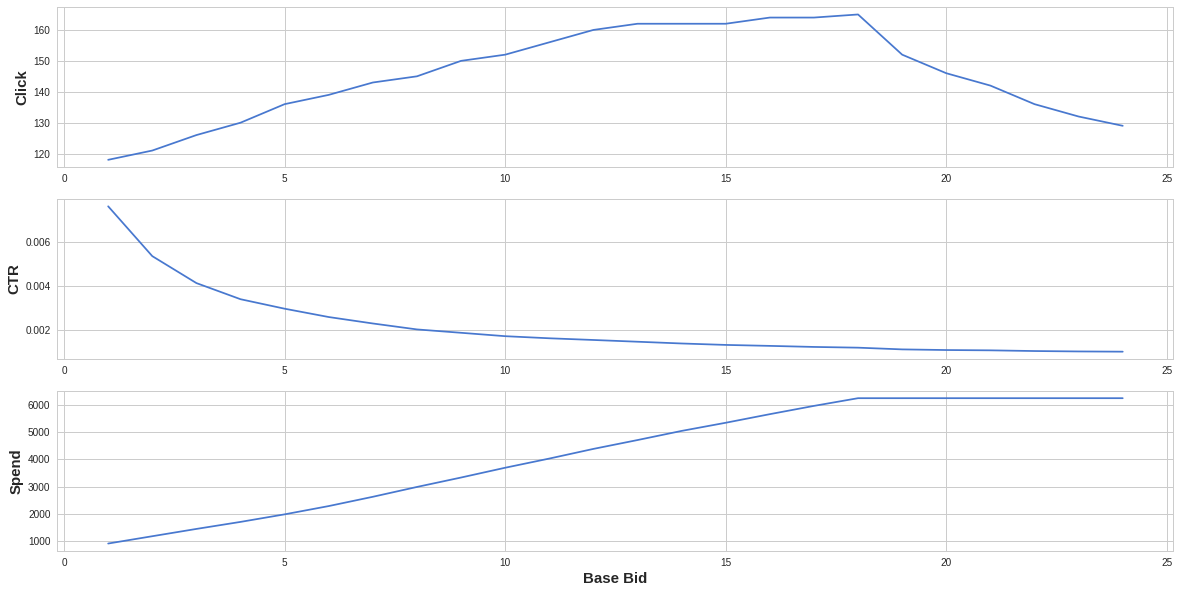

In [0]:
eval_linear_df.sort_values(by=['bid_base'], ascending=False, inplace=True)#sort dataframe via click and CTR
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(311)
eval_linear_df['clicks'].plot(subplots = True, ax = ax1)
ax2 = fig.add_subplot(312)
eval_linear_df['CTR'].plot(subplots = True, ax = ax2)
ax3 = fig.add_subplot(313)
eval_linear_df['spend'].plot(subplots = True, ax = ax3)

ax3.set_xlabel('Base Bid', fontweight = 'bold', fontsize = 15)
ax1.set_ylabel('Click', fontweight = 'bold', fontsize = 15)
ax2.set_ylabel('CTR', fontweight = 'bold', fontsize = 15)
ax3.set_ylabel('Spend', fontweight = 'bold', fontsize = 15)

##Non-Linear Stratagy

##Polynomial Bidding(Inspire from Quaderic Bidding)

In [0]:
with open('/content/drive/My Drive/pickle_model_xgb_4.pkl', 'rb') as file:  
    XGBoots = pickle.load(file)
preds = XGBoots.predict_proba(x_val.as_matrix())
preds_label = XGBoots.predict(x_val.as_matrix())
accuracy = accuracy_score(y_val.fillna(0).as_matrix(), preds_label)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
confusion_matrix(y_val.fillna(0).as_matrix(), preds_label)

Accuracy: 99.01%


array([[300816,   2907],
       [   111,     91]])

In [0]:
preds_1 = [pred[1] for pred in preds]
avgCTR = sum(y_val)*100/len(y_val)
print(avgCTR)

0.06646376573167723


In [0]:

eval_poly = pd.DataFrame(columns=['exponent','bid_base','Imps','spend','clicks','CTR','eCPC','CPM'])

spend = 0
budget = 6250000
exp_iter = 0
for exp in range(4,5):
  iteration = 0
  for bid_base in np.arange(12,15,0.1):
      num_click = 0
      flag = True
      Imps = 0
      spend = 0
      iteration += 1
      count = 0
      for i in range(val.shape[0]):
          bid = bid_base*(preds_1[i]/avgCTR)**exp
          #print(bid, preds_1[i], i)
          if bid >= val['payprice'].iloc[i] and flag:
              spend = spend + val['payprice'].iloc[i]
              if spend > budget:
                  spend = spend - val['payprice'].iloc[i]
                  flag = False
                  break
              num_click = num_click + val['click'].iloc[i]
              Imps = Imps + 1
          count += 1
      print(bid_base, count)
      CTR = num_click/Imps
      eCPC = spend/1000/num_click
      CPM = spend*1000/Imps
      tmp = pd.DataFrame( [[exp, bid_base, Imps, spend, num_click, CTR, eCPC, CPM]], columns=['exponent','bid_base','Imps','spend','clicks','CTR','eCPC','CPM'])
      eval_poly = pd.concat([eval_poly, tmp], ignore_index = True)


12.0 303925
12.1 303925
12.2 303925
12.299999999999999 303925
12.399999999999999 303925
12.499999999999998 303925
12.599999999999998 303925
12.699999999999998 303925
12.799999999999997 303925
12.899999999999997 303925
12.999999999999996 303925
13.099999999999996 303925
13.199999999999996 303925
13.299999999999995 303925
13.399999999999995 303925
13.499999999999995 303925
13.599999999999994 303925
13.699999999999994 303925
13.799999999999994 303925
13.899999999999993 303866
13.999999999999993 302818
14.099999999999993 301869
14.199999999999992 301253
14.299999999999992 300235
14.399999999999991 299152
14.499999999999991 298292
14.59999999999999 297514
14.69999999999999 296669
14.79999999999999 295749
14.89999999999999 294988


In [0]:
#sort dataframe via click and CTR in order to find optimal bid price
eval_poly.sort_values(by=['clicks', 'CTR'], ascending=False, inplace=True)#sort dataframe via click and CTR
eval_poly.head(30)

,exponent,bid_base,Imps,spend,clicks,CTR,eCPC,CPM
11,4,13.1,94693,6086279,172,0.001816,35.385343,64273.800598
12,4,13.2,94958,6104573,172,0.001811,35.491703,64287.084816
13,4,13.3,95230,6125322,172,0.001806,35.612337,64321.348315
14,4,13.4,95530,6146284,172,0.001800,35.734209,64338.783628
15,4,13.5,95810,6166022,172,0.001795,35.848965,64356.768605
16,4,13.6,96085,6186710,172,0.001790,35.969244,64387.885726
17,4,13.7,96360,6206838,172,0.001785,36.086267,64413.013699
18,4,13.8,96719,6230110,172,0.001778,36.221570,64414.541093
19,4,13.9,97006,6249864,172,0.001773,36.336419,64427.602416
6,4,12.6,93218,5983747,171,0.001834,34.992673,64190.896608


##ORTB1

In [0]:
with open('/content/drive/My Drive/pickle_model_xgb.pkl', 'rb') as file:  
    XGBoots = pickle.load(file)
preds = XGBoots.predict_proba(x_val.as_matrix())
preds_label = XGBoots.predict(x_val.as_matrix())
accuracy = accuracy_score(y_val.fillna(0).as_matrix(), preds_label)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
confusion_matrix(y_val.fillna(0).as_matrix(), preds_label)

Accuracy: 99.20%


array([[301393,   2330],
       [   108,     94]])

In [0]:
preds_1 = [pred[1] for pred in preds]
avgCTR = sum(y_val)*100/len(y_val)
print(avgCTR)

0.06646376573167723


In [0]:

eval_ortb_df = pd.DataFrame(columns=['c','m','clicks','spend','Imps','CTR','eCPC','CPM'])

spend = 0
budget = 6250000
exp_iter = 0
#m_list = [1e-7,1e-6,1e-5,1e-4,1e-3]
m_list = [1e-6]
for c in np.arange(0.0671,0.0679,0.0001):
  iteration = 0
  for m in m_list:
      num_click = 0
      flag = True
      Imps = 0
      spend = 0
      iteration += 1
      count = 0
      for i in range(val.shape[0]):
          bid = np.sqrt(c / m * preds_1[i] + c ** 2) - c
          #print(bid, preds_1[i], i)
          if bid >= val['payprice'].iloc[i] and flag:
              spend = spend + val['payprice'].iloc[i]
              if spend > budget:
                  spend = spend - val['payprice'].iloc[i]
                  flag = False
                  break
              num_click = num_click + val['click'].iloc[i]
              Imps = Imps + 1
          count += 1
      print(c,m, count)
      CTR = num_click/Imps
      eCPC = spend/1000/num_click
      CPM = spend*1000/Imps
      tmp = pd.DataFrame( [[c, m, num_click, spend/1000, Imps, CTR, eCPC, CPM]], columns=['c','m','clicks','spend','Imps','CTR','eCPC','CPM'])
      eval_ortb_df = pd.concat([eval_ortb_df, tmp], ignore_index = True)


0.0671 1e-06 303617
0.06720000000000001 1e-06 303347
0.06730000000000001 1e-06 302990
0.06740000000000002 1e-06 302656
0.06750000000000002 1e-06 301900
0.06760000000000002 1e-06 301584
0.06770000000000002 1e-06 301146
0.06780000000000003 1e-06 300931


In [0]:
#sort dataframe via click and CTR in order to find optimal bid price
eval_ortb_df.sort_values(by=['clicks', 'CTR'], ascending=False, inplace=True)#sort dataframe via click and CTR
eval_ortb_df.head(10)

,c,m,clicks,spend,Imps,CTR,eCPC,CPM
1,0.0672,0.000001,149,6249.993,156455,0.000952,41.946262,39947.544022
0,0.0671,0.000001,149,6249.975,156502,0.000952,41.946141,39935.432135
5,0.0676,0.000001,148,6249.944,156079,0.000948,42.229351,40043.465168
4,0.0675,0.000001,148,6249.948,156149,0.000948,42.229378,40025.539709
3,0.0674,0.000001,148,6249.986,156290,0.000947,42.229635,39989.673044
2,0.0673,0.000001,148,6249.960,156365,0.000947,42.229459,39970.325840
7,0.0678,0.000001,147,6249.938,155938,0.000943,42.516585,40079.634214
6,0.0677,0.000001,147,6249.989,155984,0.000942,42.516932,40068.141604


##ORTB2

In [0]:
with open('/content/drive/My Drive/pickle_model_xgb.pkl', 'rb') as file:  
    XGBoots = pickle.load(file)
preds = XGBoots.predict_proba(x_val.as_matrix())
preds_label = XGBoots.predict(x_val.as_matrix())
accuracy = accuracy_score(y_val.fillna(0).as_matrix(), preds_label)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
confusion_matrix(y_val.fillna(0).as_matrix(), preds_label)

Accuracy: 99.14%


array([[301222,   2501],
       [   114,     88]])

In [0]:
preds_1 = [pred[1] for pred in preds]
avgCTR = sum(y_val)*100/len(y_val)
print(avgCTR)

0.06646376573167723


In [0]:

eval_ortb2_df = pd.DataFrame(columns=['c','m','clicks','spend','Imps','CTR','eCPC','CPM'])

spend = 0
budget = 6250000
exp_iter = 0
#m_list = [1e-7,1e-6,1e-5,1e-4,1e-3]
m_list = [1e-4]
for c in np.arange(18,25,1):
  iteration = 0
  for m in m_list:
      num_click = 0
      flag = True
      Imps = 0
      spend = 0
      iteration += 1
      count = 0
      for i in range(val.shape[0]):
          bid = c*(((preds_1[i]+np.sqrt((c**2)*(m**2)+(preds_1[i]**2)))/(c*m))**(1/3) - ((c*m)/preds_1[i]+np.sqrt((c**2)*(m**2)+(preds_1[i])**2))**(1/3))
          #print(bid, preds_1[i], i)
          if bid >= val['payprice'].iloc[i] and flag:
              spend = spend + val['payprice'].iloc[i]
              if spend > budget:
                  spend = spend - val['payprice'].iloc[i]
                  flag = False
                  break
              num_click = num_click + val['click'].iloc[i]
              Imps = Imps + 1
          count += 1
      print(c,m, count)
      CTR = num_click/Imps
      eCPC = spend/1000/num_click
      CPM = spend*1000/Imps
      tmp = pd.DataFrame( [[c, m, num_click, spend/1000, Imps, CTR, eCPC, CPM]], columns=['c','m','clicks','spend','Imps','CTR','eCPC','CPM'])
      eval_ortb2_df = pd.concat([eval_ortb2_df, tmp], ignore_index = True)


18 0.0001 303925
19 0.0001 296085
20 0.0001 280148
21 0.0001 267428
22 0.0001 256212
23 0.0001 244585
24 0.0001 235178


In [0]:
#sort dataframe via click and CTR in order to find optimal bid price
eval_ortb2_df.sort_values(by=['clicks', 'CTR'], ascending=False, inplace=True)#sort dataframe via click and CTR
eval_ortb2_df.head(10)

,c,m,clicks,spend,Imps,CTR,eCPC,CPM
0,18,0.0001,134,6053.927,157343,0.000852,45.178560,38475.985586
1,19,0.0001,130,6249.993,158407,0.000821,48.076869,39455.282910
2,20,0.0001,117,6249.957,154620,0.000757,53.418436,40421.400854
3,21,0.0001,115,6249.987,151566,0.000759,54.347713,41236.075373
5,23,0.0001,114,6249.939,145703,0.000782,54.824026,42895.060500
4,22,0.0001,114,6249.975,148727,0.000767,54.824342,42023.136350
6,24,0.0001,113,6249.998,143226,0.000789,55.309717,43637.314454


#Test  Set

##Creteria 1

In [0]:
bid_id = test['bidid']
preds = XGBoots.predict_proba(x_test.as_matrix())
#preds = Logist.predict_proba(x_test.as_matrix())
print(preds)
w = 27860/2430981
valid_score = preds[:,1]/(preds[:,1]+(1-preds[:,1])/w)
avgCTR = sum(val['click'])*100/len(val)
preds_1 = [pred[1] for pred in preds]
ORTB_bid_price = []
for pred in preds_1: 
  ORTB_bid_price.append(14*(pred/avgCTR)**4)
 

[[0.82908845 0.17091155]
 [0.6390007  0.3609993 ]
 [0.9685633  0.03143671]
 ...
 [0.9640061  0.03599386]
 [0.78628105 0.21371897]
 [0.9643451  0.03565488]]


In [0]:
print(ORTB_bid_price[0:500])
result_df = pd.DataFrame(columns = ['bidid','bidprice'])
result_df['bidprice'] = ORTB_bid_price
result_df['bidid'] = bid_id

[612.172640418439, 12184.666082803595, 0.7007070616167914, 26.38687032050764, 12.673322536978999, 447.8048295209878, 5.465371745025843, 153.65808416290167, 86.7560479896922, 86.96709805588829, 14.663039350048145, 24258.418752029465, 80.83302829248883, 27.173086565940604, 198.11350357992643, 6.471929522200709, 11.563750860352268, 1.973051428398556, 18.230858799817156, 98.61886957754457, 0.8931867155179558, 397.61704872273964, 15.889007523407388, 33.79536274978834, 0.25288682041851124, 7745.8238049385745, 13.330755534465926, 110.65790680891483, 40.827140695638334, 0.5366397156437577, 2.8244559478985924, 8.854575979566361, 0.15542042740893985, 43.121727729802934, 2254.445100158867, 20.71235604347518, 133.3074168257127, 22.273270249545615, 26.856636157550906, 6.547425561491358, 24.327186487270716, 2.291240573000504, 12.801416307823784, 186.60448331280767, 8.191406606422365, 39.30279491117504, 0.7294836328281594, 37.841318373440586, 5.888654549089454, 5.563340653291087, 145.8656078621996, 0

In [0]:
result_df.head()

,bidid,bidprice
0,366c563de7d90feb9d4dab53e795a93fb3157387,612.172640
1,29167d4caa719788b5a342dbaa25151d53121f80,12184.666083
2,ff8bc3f4d44a3ea60c5f3a3a8fbe7cd98fb2966e,0.700707
3,844c2da00d45315f20b748ec131c26ee99a7cbc7,26.386870
4,c6017f0ad0c44d7d0c9b62583ea863f28941c0ca,12.673323


In [0]:
result_df.to_csv("/content/drive/My Drive/result_polynominal_xgb_4_14.1.csv")#store dataframe to csv

##Creteria 2

In [0]:
bid_id = test['bidid']
preds = XGBoots.predict_proba(x_test.as_matrix())
#preds = Logist.predict_proba(x_test.as_matrix())
print(preds)
w = 27860/2430981
valid_score = preds[:,1]/(preds[:,1]+(1-preds[:,1])/w)
avgCTR = sum(val['click'])*100/len(val)
preds_1 = [pred[1] for pred in preds]

[[0.82908845 0.17091155]
 [0.6390007  0.3609993 ]
 [0.9685633  0.03143671]
 ...
 [0.9640061  0.03599386]
 [0.78628105 0.21371897]
 [0.9643451  0.03565488]]


###Increase bidding price in given prdeict probability range

###Polynomial

In [0]:
import sys
lower_prob = 0.3 # @param {type:'number'}
higher_prob = 0.85 # @param {type:'number'}
ORTB_bid_price = []
for pred in preds_1: 
  if pred >= lower_prob and pred <= higher_prob:
    ORTB_bid_price.append((14*(pred/avgCTR)**4)*1.1)
  elif pred<lower_prob:
    ORTB_bid_price.append((14*(pred/avgCTR)**4)*(1/0.3*pred))
  else:
    ORTB_bid_price.append((14*(pred/avgCTR)**4)*(((1-1/0.15)/0.85)*pred+1/0.15))

###Linear

In [0]:
import sys
lower_prob = 0.3 # @param {type:'number'}
higher_prob = 0.85 # @param {type:'number'}
ORTB_bid_price = []
for pred in preds_1: 
    if pred >0.09 and pred <=0.4:
      ORTB_bid_price.append(47*(pred/avgCTR)*3)
    elif pred>0.4 and pred <=0.85:
      ORTB_bid_price.append(47*(pred/avgCTR))
    elif pred>0.85:
      ORTB_bid_price.append(300)
    else:
      ORTB_bid_price.append(0)
    

In [0]:
print(ORTB_bid_price[0:500])
result_df = pd.DataFrame(columns = ['bidid','bidprice'])
result_df['bidprice'] = ORTB_bid_price
result_df['bidid'] = bid_id

[362.58145108523934, 765.8443482744664, 0, 0, 0, 335.31987609264286, 0, 256.640951784512, 222.4651792126772, 222.6003528430523, 0, 303.23649711475366, 218.56686149121697, 0, 273.47373577769804, 0, 0, 0, 0, 229.70852268514875, 0, 325.5017689546884, 0, 0, 0, 683.8392232613693, 0, 236.41918532070844, 0, 0, 0, 0, 0, 0, 502.2813116747996, 0, 247.68555651740675, 0, 0, 0, 0, 0, 0, 269.4124257180212, 0, 0, 0, 0, 0, 0, 253.3234128135782, 0, 0, 0, 0, 0, 0, 0, 304.29759114589723, 0, 0, 0, 0, 288.3781142984471, 0, 0, 0, 345.8732506461478, 0, 0, 335.4550497230179, 0, 0, 0, 208.70454473631216, 336.58869367972534, 198.92023100595145, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 285.8838510187803, 0, 260.5245382356835, 0, 0, 195.73087937626434, 0, 257.5223622527342, 0, 344.9651278959642, 570.3172093209728, 0, 0, 0, 241.59159986130746, 0, 732.0338068856387, 457.39000993369535, 0, 230.35533925463065, 0, 0, 240.35406251446258, 243.97891917662454, 0, 217.13968274853016, 0, 0, 239.48932746486128, 249.48068508954884, 0

In [0]:
result_df.head()

,bidid,bidprice
0,366c563de7d90feb9d4dab53e795a93fb3157387,362.581451
1,29167d4caa719788b5a342dbaa25151d53121f80,765.844348
2,ff8bc3f4d44a3ea60c5f3a3a8fbe7cd98fb2966e,0.000000
3,844c2da00d45315f20b748ec131c26ee99a7cbc7,0.000000
4,c6017f0ad0c44d7d0c9b62583ea863f28941c0ca,0.000000


In [0]:
result_df.to_csv("/content/drive/My Drive/result_polynominal_xgb_4_cret2.csv")#store dataframe to csv

###Distribution Plot

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(0.5, 1.0, 'Probability Distribution of Predicted Test Set')

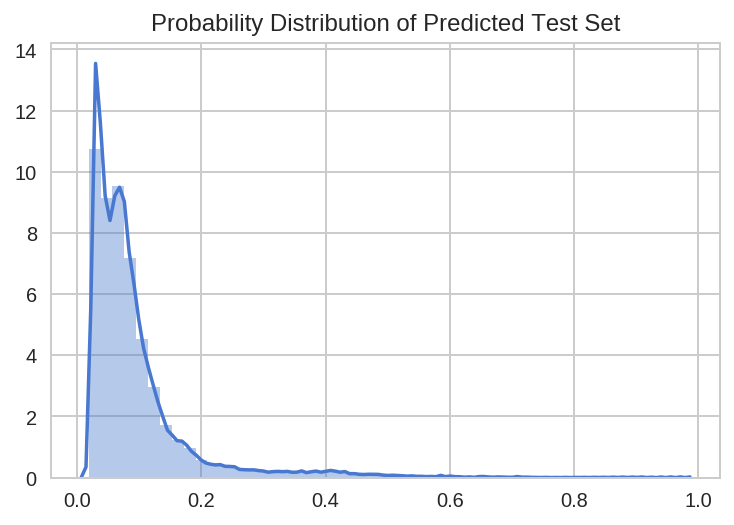

In [0]:
import matplotlib.pyplot as plt
import seaborn

seaborn.set(style="whitegrid", palette="muted", color_codes=True)
p1 = plt.figure(figsize=(6,4),dpi=144)
seaborn.distplot(preds_1, color="b")

plt.title('Probability Distribution of Predicted Test Set')